In [1]:
import matplotlib.pyplot as plt
import seaborn as sns

import pandas as pd
import numpy as np

import plotly.graph_objects as go
from plotly.subplots import make_subplots

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier  # ou DecisionTreeRegressor
from sklearn.metrics import accuracy_score, classification_report

from sklearn.model_selection import GridSearchCV



# Analyse de la base lycéenne 


In [2]:
dataMath = pd.read_csv('./data/student/student-mat.csv',sep=';',  dtype={0: str})
dataMath.head()

#school;sex;age;address;famsize;Pstatus;Medu;Fedu;Mjob;Fjob;reason;guardian;
# traveltime;studytime;failures;schoolsup;famsup;paid;activities;nursery;higher;
# internet;romantic;famrel;freetime;goout;Dalc;Walc;health;absences;G1;G2;G3


,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


<function matplotlib.pyplot.show(close=None, block=None)>

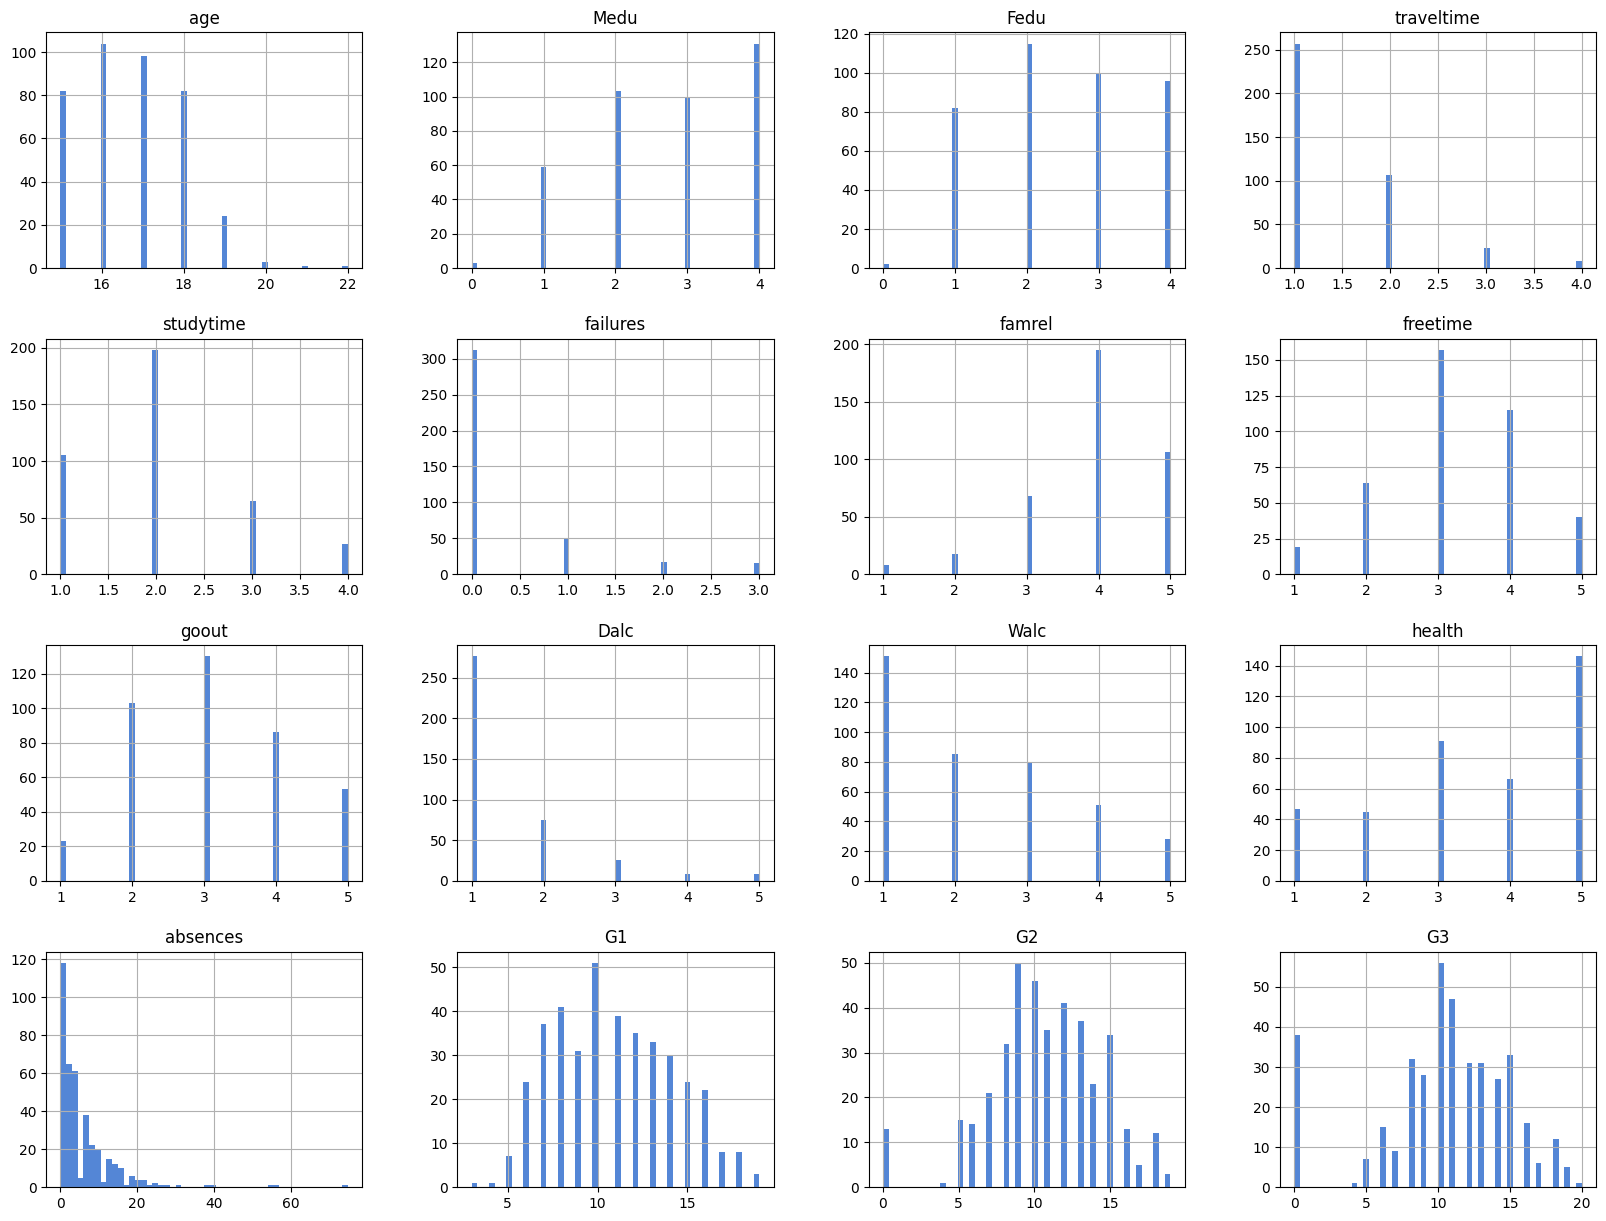

In [3]:
dataMath[dataMath.columns].hist(bins=50, figsize=(20,15), color='#5486d6')
plt.show

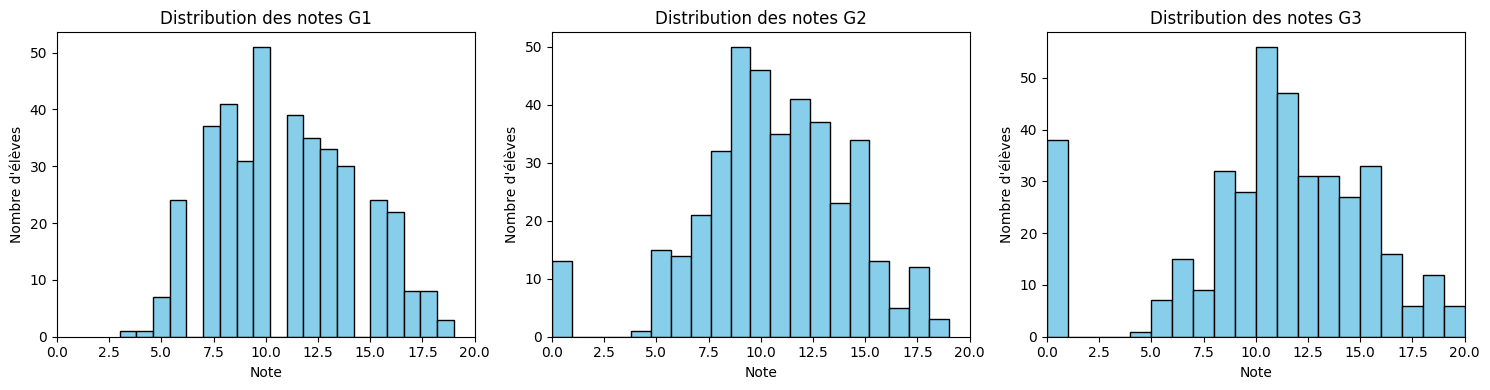

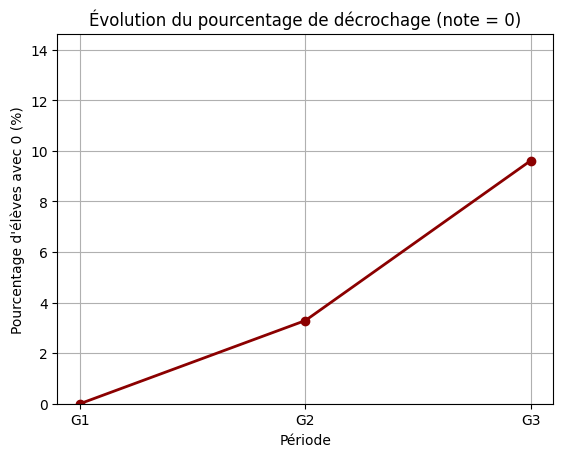

In [4]:
fig, axs = plt.subplots(1, 3, figsize=(15, 4))

for idx, col in enumerate(['G1', 'G2', 'G3']):
    axs[idx].hist(dataMath[col], bins=20, color='skyblue', edgecolor='black')
    axs[idx].set_title(f'Distribution des notes {col}')
    axs[idx].set_xlim(0, 20)
    axs[idx].set_xlabel('Note')
    axs[idx].set_ylabel('Nombre d\'élèves')

plt.tight_layout()
plt.show()


# Total d'élèves (lignes dans le dataset)
total_eleves = len(dataMath)

# Pourcentage de décrocheurs (note = 0) par période
zero_percentages = {
    'G1': (dataMath['G1'] == 0).sum() / total_eleves * 100,
    'G2': (dataMath['G2'] == 0).sum() / total_eleves * 100,
    'G3': (dataMath['G3'] == 0).sum() / total_eleves * 100
}

# Tracer le graphe en ligne
plt.plot(list(zero_percentages.keys()), list(zero_percentages.values()),
         marker='o', linestyle='-', color='darkred', linewidth=2)

plt.title("Évolution du pourcentage de décrochage (note = 0)")
plt.xlabel("Période")
plt.ylabel("Pourcentage d'élèves avec 0 (%)")
plt.ylim(0, max(zero_percentages.values()) + 5)
plt.grid(True)
plt.show()


In [5]:
dataPor = pd.read_csv('./data/student/student-por.csv',sep=';',  dtype={0: str})
dataPor.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,4,0,11,11
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,2,9,11,11
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,6,12,13,12
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,0,14,14,14
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,0,11,13,13


<function matplotlib.pyplot.show(close=None, block=None)>

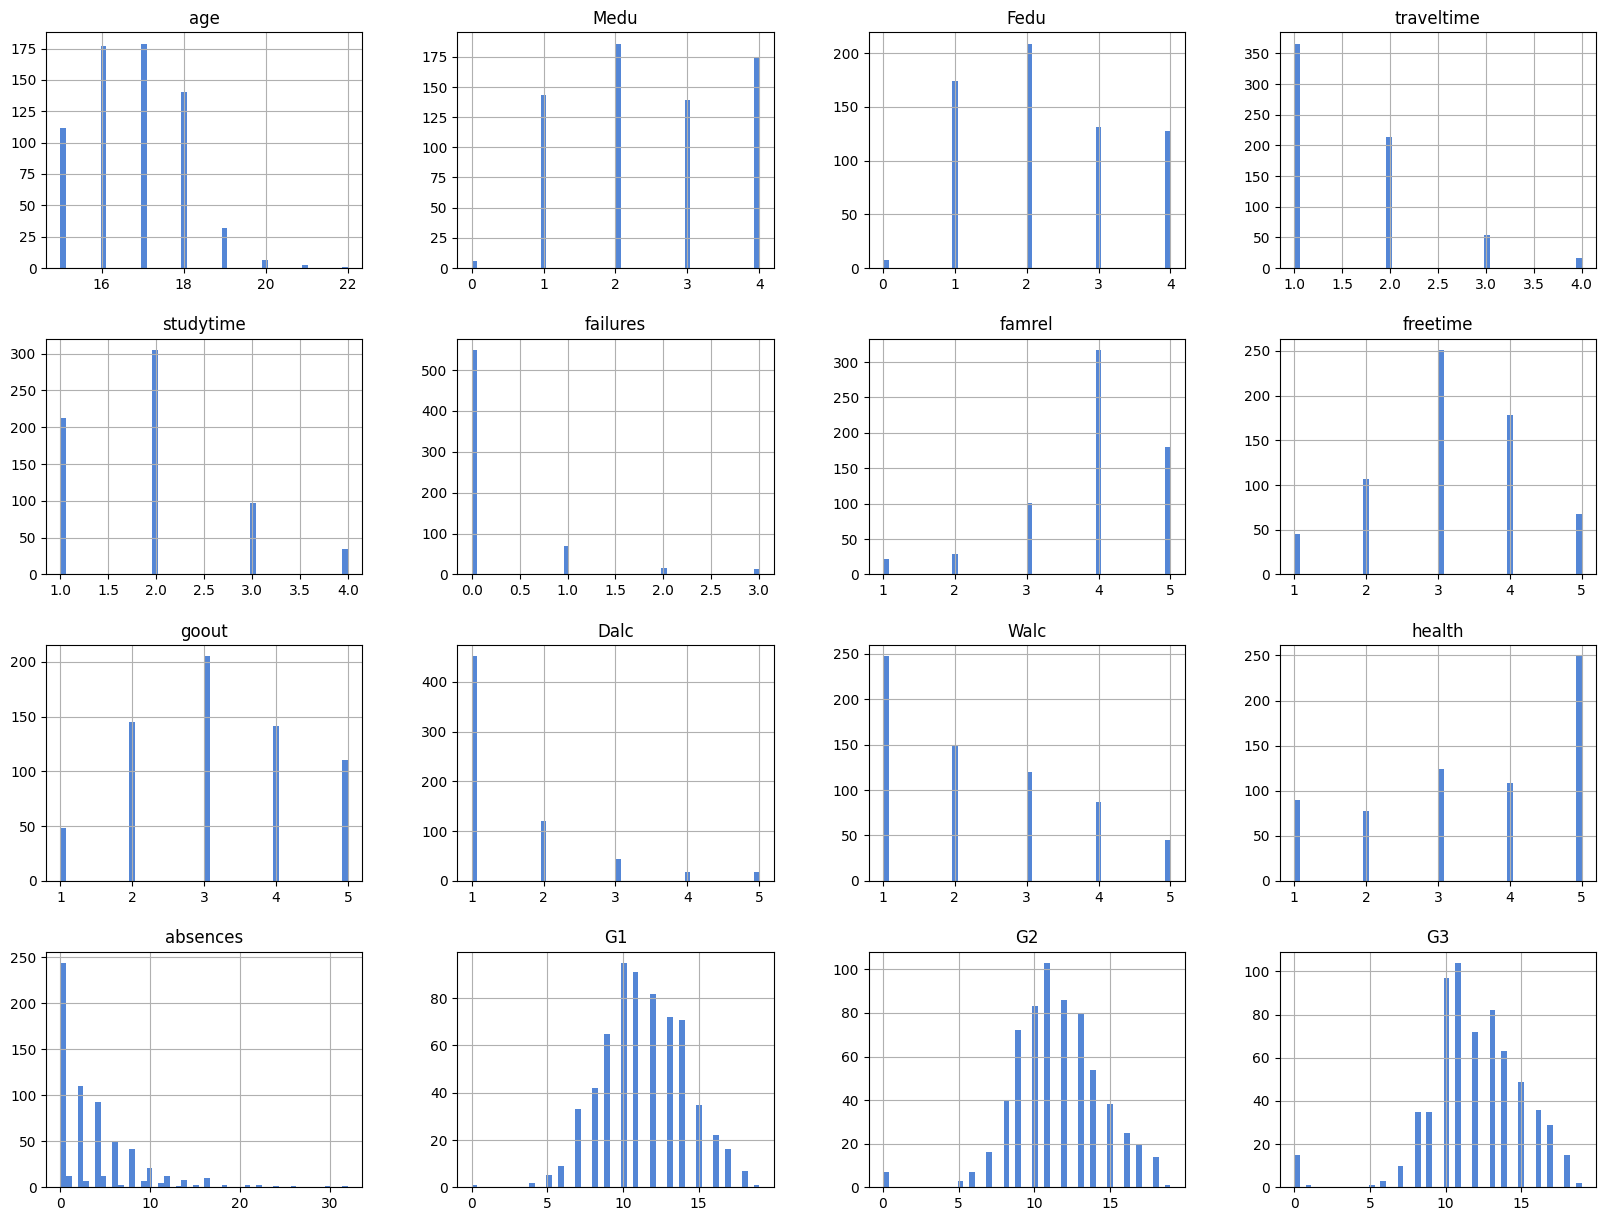

In [6]:
dataPor[dataPor.columns].hist(bins=50, figsize=(20,15), color='#5486d6')
plt.show

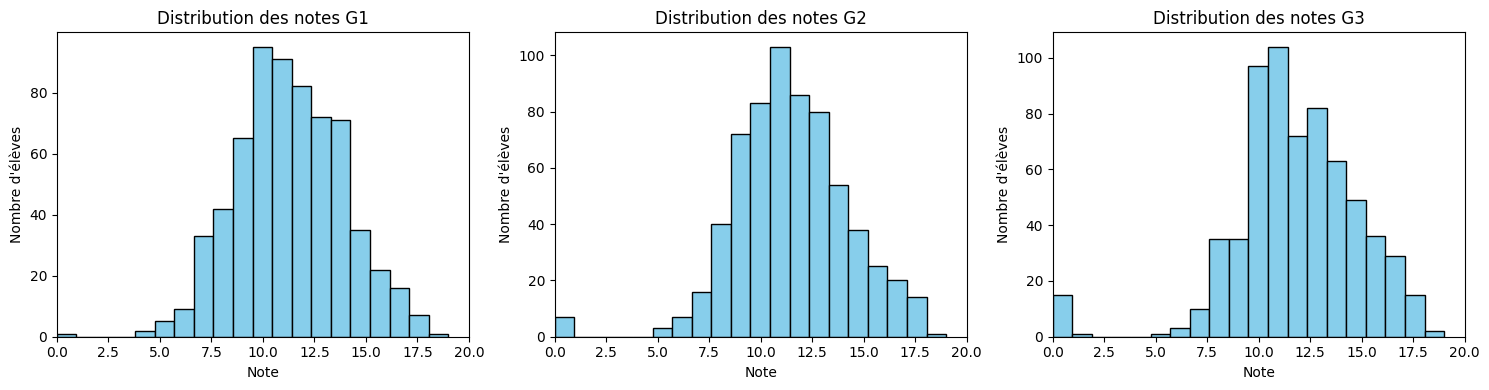

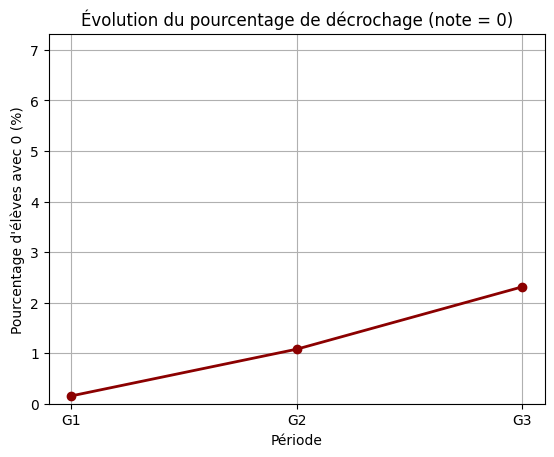

In [7]:
fig, axs = plt.subplots(1, 3, figsize=(15, 4))

for idx, col in enumerate(['G1', 'G2', 'G3']):
    axs[idx].hist(dataPor[col], bins=20, color='skyblue', edgecolor='black')
    axs[idx].set_title(f'Distribution des notes {col}')
    axs[idx].set_xlim(0, 20)
    axs[idx].set_xlabel('Note')
    axs[idx].set_ylabel('Nombre d\'élèves')

plt.tight_layout()
plt.show()


# Total d'élèves (lignes dans le dataset)
total_eleves = len(dataPor)

# Pourcentage de décrocheurs (note = 0) par période
zero_percentages = {
    'G1': (dataPor['G1'] == 0).sum() / total_eleves * 100,
    'G2': (dataPor['G2'] == 0).sum() / total_eleves * 100,
    'G3': (dataPor['G3'] == 0).sum() / total_eleves * 100
}

# Tracer le graphe en ligne
plt.plot(list(zero_percentages.keys()), list(zero_percentages.values()),
         marker='o', linestyle='-', color='darkred', linewidth=2)

plt.title("Évolution du pourcentage de décrochage (note = 0)")
plt.xlabel("Période")
plt.ylabel("Pourcentage d'élèves avec 0 (%)")
plt.ylim(0, max(zero_percentages.values()) + 5)
plt.grid(True)
plt.show()

In [18]:
dataMath['Target'] = (dataMath['G3'] < 5).astype(int)
colonnes_a_supprimer = ['G1','G2','G3', 'absences']
X = dataMath.drop(colonnes_a_supprimer, axis=1)


X = pd.get_dummies(X)
X = X.drop(['Target'], axis=1)  
y = dataMath['Target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


Accuracy : 0.7088607594936709
              precision    recall  f1-score   support

           0       0.92      0.76      0.83        74
           1       0.00      0.00      0.00         5

    accuracy                           0.71        79
   macro avg       0.46      0.38      0.41        79
weighted avg       0.86      0.71      0.78        79



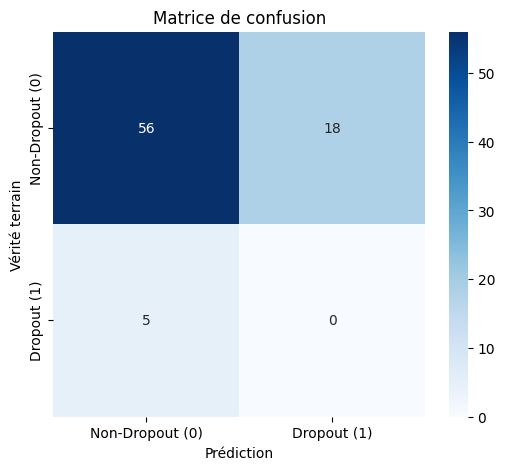

In [23]:
model = DecisionTreeClassifier(max_depth=5, random_state=42, class_weight="balanced")
model.fit(X_train, y_train)


y_pred = model.predict(X_test)
print("Accuracy :", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)
labels = ['Non-Dropout (0)', 'Dropout (1)']

plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
plt.xlabel('Prédiction')
plt.ylabel('Vérité terrain')
plt.title('Matrice de confusion')
plt.show()

Mjob_services    0.119158
famrel           0.093132
address_R        0.092167
schoolsup_yes    0.081921
freetime         0.080498
Medu             0.066083
failures         0.065606
Fjob_services    0.065537
higher_no        0.065537
age              0.065537
dtype: float64


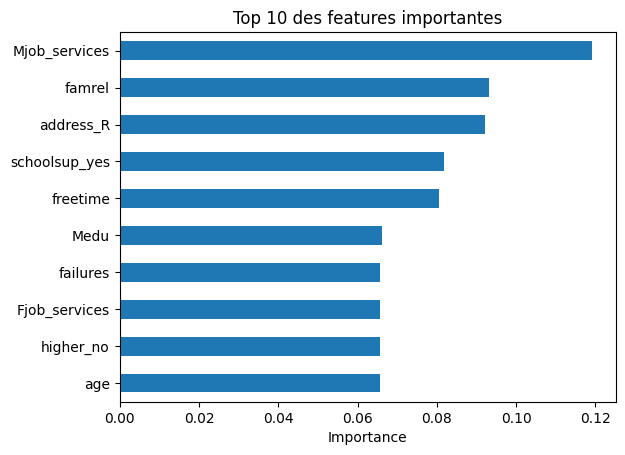

In [10]:
import matplotlib.pyplot as plt

# Récupère l’importance des features
importances = model.feature_importances_

# Crée une série pandas indexée par les noms des colonnes
features = pd.Series(importances, index=X.columns)

# Trie par importance décroissante et affiche les 10 premières
print(features.sort_values(ascending=False).head(10))

features.sort_values(ascending=False).head(10).plot(kind='barh')
plt.gca().invert_yaxis()  # Inverse l’ordre pour avoir la plus importante en haut
plt.xlabel('Importance')
plt.title('Top 10 des features importantes')
plt.show()